In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
%matplotlib inline


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

In [10]:
dataset=pd.read_csv('C:/Users/Akhil.pathak/Downloads/principal.csv')
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')
dataset.head()
if set(['date']).issubset(dataset.columns):
    dataset.drop(['date'],axis=1, inplace=True)
    
#ds = dataset.sample(frac=1)
ds=dataset;
ds

,pc1,pc2,normality
0,-1.847125,-0.087182,1
1,-1.400199,0.159419,1
2,-2.627847,-0.697001,1
3,-1.906529,0.126705,1
4,-1.598385,-0.214070,1
5,-1.494772,-0.066351,1
6,-1.832324,0.129292,1
7,-1.854742,0.121941,1
8,-1.678902,2.202421,1
9,7.537439,-8.876311,0


In [11]:
x = ds.iloc[:,0:2]
y = ds.iloc[:,2:3]
y.head()

,normality
0,1
1,1
2,1
3,1
4,1


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_laun

[0.6792452830188679, 0.5849056603773585, 0.7547169811320755, 0.7358490566037735, 0.7735849056603774, 0.7547169811320755, 0.7924528301886793, 0.8113207547169812, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.8113207547169812, 0.8113207547169812, 0.8113207547169812, 0.7924528301886793, 0.8113207547169812, 0.8113207547169812, 0.8113207547169812, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793]


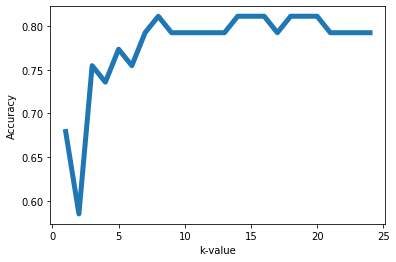

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  scores[k] = metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))
plt.plot(k_range,scores_list, linewidth=5)
plt.xlabel('k-value')
plt.ylabel('Accuracy')
print(scores_list)

In [21]:
scores = {}
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
scores = metrics.accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.81      1.00      0.89        42

    accuracy                           0.81        53
   macro avg       0.90      0.55      0.53        53
weighted avg       0.85      0.81      0.74        53



C:\Users\Akhil.pathak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
